We will work with descriptive statistics and learn common ways to summarize data. After that, we will vanture into inferential statistics, where we try to uncover attributes of a population based on a sample.


# **What is Data?**
---
The pragmatic viewpoint regarding data underscores that data itself doesn't hold inherent significance. Rather, it is the meticulous analysis of data, coupled with a deep understanding of its origins and production methods, that propels the wave of innovations and solutions we witness today.

While it may sound somewhat disheartening, statistics reveal that merely 13% of Machine Learning projects achieve success. This limited triumph can be attributed to the inclusion of meticulously gathered data from authentic and pertinent sources—essentially adhering to a meticulous standard. Any semblance of misleading discoveries is actively sidestepped or subsequently rectified. In essence, the employment of untainted and dependable training data is the hallmark of these accomplishments. Yet, even with such diligence, the inherent unpredictability of real-world scenarios often uncovers deficiencies within our systems.

The complexities of algorithms and the myriad permutations that Machine Learning introduces frequently lead us astray. Regrettably, we often overlook the essence of scrutinizing the origins and fundamental authenticity of the data at hand. This inadvertently results in us treating these algorithmic tools as enigmatic black boxes. Thus, recognizing the paramount importance of delving into every nook and cranny of data and its analysis remains an imperative endeavor.

# **Descriptive vs Inferential Statistics**
---
Usually statistics rings a bell of the following: 
* Mean (Average)
* Median ( Middle number/value in a sorted ascending or descending list of numbers)
* Mode ( Most frequent value )
* Charts ( Graphs like - bars, scatter, histograms etc.)
* Bell curves
and we use these to describe data. This is the most commonly perceived view of statistics, which is called _descripitve statistics_.

_Inferential Statistics_ tries to uncover attributes about a larger population, often based on a sample. To infer conclusions about a large group(that is too large to observe) we want to draw conclusions about them with a few members of that group.

# **Populations, Samples and Bias**
---

* Population is a large group.
* Sample is a subset of a large group at whole.
* Bias overrepresents a certain group at the expense of other groups.

to mitigate bias, random selection is required, so "Randomness" in the data is very important if we are looking to avoid "Skewness" in the data. If the bias in the data isn't taken care of then it could in turn cause your machine learning model to infer conclusions based on that bias. 

However, remember that math and machine learning models doesn't understand the bias in your data. As a good data science professional, it is up to you to expound and scrutinize the source and how it could have biased the data and bring up questions thereof.

#**Part-1: Descriptive Statistics**
---

####**Mean and Weighted mean**

\begin{equation}
\bar{x} = \frac{x_1+x_2+......+x_n}{n}=∑\frac{x_i}{n} \\
\\
\\
𝞵= \frac{x_1+x_2+......+x_n}{N} = ∑\frac{x_i}{N}
\end{equation}


In [ ]:
#number of pets each person owns
sample = [1, 3, 2, 5, 7, 0, 2, 3]
mean = sum(sample)/len(sample)
print(mean)

2.875


#####**Weighted Mean**
---
The we commonly use gives equal importance to each value. But the mean can be manipulated if each item is given a different weight($w$)

\begin{equation}
\text{weighted mean}= \frac{(x_1 . w_1) + (x_2.w_2) + ... + (x_n.w_n)}{w_1+w_2+...+w_n}
\end{equation}

This can be helpful when we want some values to contribute to the mean more than others.

If you have 2 terms of exam and a final exam and if we give each of the terms 20% weight and the final one 40% weight of the final grade then: 

In [ ]:
grades=[90,80,72]
weights=[0.2,0.2,0.4]
weighted_mean=sum(g*w for g, w in zip(grades,weights))/sum(weights)
print(weighted_mean)

78.49999999999999


We weight each exam score through multiplication accordingly and instead of dividing the value count, we divide by the sum of weights. Weightings don't have to be percentages. As any numbers used for weights will end up getting poportionalized, eg. $0.2:0.4$ is simply $1:2$, if we substitute this ratio in the above circumstances:

In [ ]:
grades=[90,80,72]
weights=[1.0,1.0,2.0]
weighted_mean=sum(g*w for g, w in zip(grades,weights))/sum(weights)
print(weighted_mean)

78.5


####**Median**
---
Median is the middlemost value in an ordered set of values. 

In [ ]:
def median(values):
  ordered=sorted(values)
  n = len(ordered)
  mid = int(n/2) -1 if n%2==0 else int(n/2)
  if n%2==0:
    return (ordered[mid]+ordered[mid+1])/2.0
  else:
    return ordered[mid]
sample=[0, 1, 5, 7, 9, 10, 14]
print(median(sample))

7


Median can be helpful if the data is skewed by $outliers$. A median can be preferable in an outliers heavy situation and  over the mean. It is less sensitive to the outliers.

<div style="border-width:1px; background:'black';"><p align="center"><strong align="center">THE MEDIAN IS A QUANTILE</strong></p><p align="Left"> There is a concenpt of <i>quantiles</i> in descriptive statistics. The concept is essentiallyy the same as a median, just cutting the data in other places besides the middle. The median is actually 50% quantile, or the value were 50% ordered values are behind it. Then there are 25%, 50%, 75% quantiles, which are known as <i>quartiles</i> because the cut the data in 25% increments.</p></div>


###**Mode**
---
The $mode$ is the most frequently occurring set of values. It primary becomes useful wehen your data is repetitive and you want to find which values occur the most frequently.

In [ ]:
from collections import defaultdict
sample=[1, 3, 2, 5, 7, 0, 2, 3]
def mode(values):
  counts= defaultdict(lambda:0)
  for s in values:
    counts[s]+=1
  max_count = max(counts.values())
  modes = [v for v in set(values) if counts[v] == max_count]
  return modes
print(mode(sample))

[2, 3]


###**Variance and Standard Deviation**
---

Often times we are interested to see how spread out our data points are, so we can have a grasp of Variety in the data. We do that by calculating the difference between a data point and the mean. Can we simplify all the differences and put it into a concise manner, as in a single number? Well, you may tempted to take an average of all the values, but among these numbers, there could exist negative numbers, which can cancel out most of the quantifiers. An approach would be to take absolute difference and then averaging them, or we could take a square of each difference:
\begin{equation}
\text{population variance} = \frac{(x_1-mean)^2 + (x_2 - mean)^2 + ... + (x_n - mean)^2}{N}
\end{equation}
More formally, 
\begin{equation}
σ^2=\frac{∑(x_i - μ)^2}{N}
\end{equation}

In [ ]:
data=[0, 1, 5, 7, 9, 10, 14]

def variance(values):
  mean=sum(values)/len(values)
  _variance= sum((v - mean)**2 for v in values)/len(values)
  return _variance
print(variance(data))

21.387755102040813


OK, It's reasonable to conclude that a higher variance means  more spread, but how do you relate this back to your original data? Obviously, the number is much larger than any of our observations, because a lot of summing and squaring was done, which corroborates the different metric of the outcome. So, how do we sqeeze it down so that it fits within the scale that we originally started with?

The opposite of a square is a square root, so let's take the square root of the $\text{variance}$, which will in turn give us the $\text{standard daviation}$

\begin{equation}
σ=\sqrt{\frac{∑(x_i - μ)^2}{N}}
\end{equation}

In [ ]:
from math import sqrt
def std_dev(values):
  return sqrt(variance(values))
print(std_dev(data))

4.624689730353898


####**Sample Variance and Standard Deviation**
---
When we are calculating variance for a sample however it needs a little tweaking:
for mean $\bar{x}$, samples $n$

\begin{equation}
\text{variance of sample},s^2= \frac{(x_i-\bar{x})^2}{n-1}\\
\text{standard deviation of sample},s= \sqrt {\frac{(x_i-\bar{x})^2}{n-1}}
\end{equation}

The reason for $(n-1)$ instead of $n$ in the divisor is that we don't underestimate the greater variance and standard daviation in the population; by taking 1 less of the total sample numbers, we create a greater variance in the sample, while acknowledging the bias we might have with the outcomes.
Let's adjust our ```variance()``` function.

In [ ]:
def variance(values,is_sample=False):
  mean=sum(values)/len(values)
  _variance= sum((v - mean)**2 for v in values)/(len(values)-(1 if is_sample else 0))
  return _variance
def std_dev(values,is_sample=False):
  return sqrt(variance(values,is_sample))

In [ ]:
print(f"Variance in the sample is: {variance(data,is_sample=True)}")
print(f"Standard deviation in the sample is: {std_dev(data,is_sample=True)}")

Variance in the sample is: 24.95238095238095
Standard deviation in the sample is: 4.99523582550223


### **The Normal Distribution**
---
The most famous distribution of all is  normal distribution also known as Gaussian distribution. The symmetrical bell shaped distribution that has most mass around  the mean, and it's spread is defined as a standard deviation. The "tails" on either side become thinner as you move away from the mean.

### **Properties of a Normal Distribution**
---
The normal distribution has several important properties that makes it useful:

* It's symmetrical; both sides are identically mirrored at the mean, which is the center.
* Most mass is at the center around the mean.
* It has a spread (being narrow or wide) that is specified by standard deviation.
* The "tails" are the least likely outcomes and approach zero infinitely but never touch zero.
* It resembles a lot of phenomena in natural and daily life, and even generalizes nonnormal problems because of the central limit theorem, which we will talk about shortly.

### **The Probability Density Function (PDF)**
---
The standard deviation plays an important role in the normal distribution, because it defines how "spead out" it is. It is actually one of the parameters alongside the mean The _probability density function (PDF)_ that creates the normal distribution is as follows:


\begin{equation}
f(x) = \frac 1σ × {\sqrt{2π}× e^{-\frac12(\frac{x-μ^2}{σ})}}
\end{equation}

In [ ]:
import math
def normal_pdf(x: float, mean:float, std_dev:float) -> float:
  return (1.0/(2.0 * math.pi *std_dev**2)**0.5)*math.exp(-1.0 * ((x-mean)**2 /(2.0 * std_dev **2)))

There's a lot to take apart in this formula, but what's important is that it accepts a mean and standard deviation(σ) as parameter, as well as an $x$-value so you can look up the likelihood at that given value.
Just as we've seen in beta distribution in [Chapter 2](https://github.com/iamzehan/A-little-bit-of-Math/blob/main/Chapter%202/Ch%202%20%20Probability.ipynb), the normal distribution is continuous. This means to retrieve a probability we need to integrate a range of $x$ values to find an area.

In [ ]:
from scipy.stats import norm
mean=64.43
std_dev=2.99
x=norm.cdf(64.43,mean,std_dev)
print(x) 

0.5


For a range probability(62-66):

In [ ]:
x=norm.cdf(66,mean,std_dev)-norm.cdf(62,mean,std_dev)
print(x)

0.4920450147062894


### **The Inverse CDF**
---
When we start doing hypothesis testing later in this chapter, we will encounter situations where we need to look up an area on the CDF and then return the corresponding $x$-value. Ofcourse, this is a backwards usage of the CDF, so we will need to use inverse CDF, which flips the axes. Using the inverse CDF is easy in scipy. We use a function called `ppf()` in Python

In [ ]:
x = norm.ppf(.95, loc=64.43, scale=2.99)
print(x)

69.3481123445849


So, we find that 95% golden retrievers are 69.348 or fewer pounds.

We can also use the inverse CDF to generate random numbers that follow the normal distribution. If I want to create a simulation that generates one thousand realistic golden retriever weights.

In [ ]:
import random
weights=[]
for i in range(0,1000):
  random_p=random.uniform(0.0, 1.0)
  random_weight = norm.ppf(random_p, loc=64.43, scale= 2.99)
  weights.append(random_weight)

In [ ]:
import pandas as pd
gr_weights=pd.DataFrame()
gr_weights['Weights']=weights

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0fcb51dbd0>]],
      dtype=object)

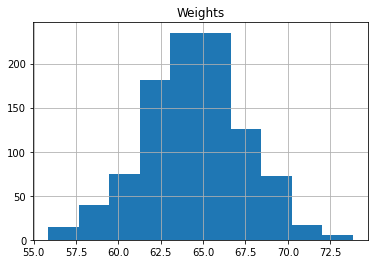

In [ ]:
gr_weights.hist()

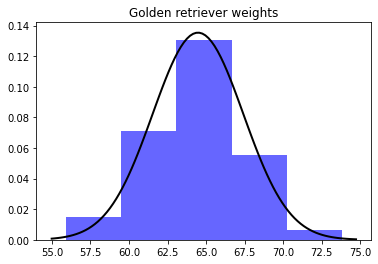

In [ ]:
import numpy as np
import statistics as stat
import matplotlib.pyplot as plt

plt.hist(gr_weights['Weights'], bins=5, density=True, alpha=0.6, color='b')
# Plot the PDF.
mu, std = norm.fit(gr_weights) 
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)
plt.title('Golden retriever weights')
  
plt.show()

#### **Z-scores**
---
It is common to rescale a normal distribution so that the mean is 0 and the standard deviation is 1, which is known as the _standard normal deviation_ . This makes it easier to compare the spread of one normal distribution to another normal distribution, even if they have different means and variances.

Of particular importance with the $\text{standard normal distribution}$ is it expresses all $x$-values in terms of standard deviations, known as $Z-scores$. Turning $x$-value into a Z-score uses a basic scaling fomula:

\begin{equation}𝓩= \frac{x-μ}{σ}\end{equation}

Here are Z-scores calculations from neighbourhoods A and B, and let's see how we can determine which neighbourhood houses are more expensive:

\begin{equation}
μ_A=140,000\\
μ_B=800,000\\
σ_A=3,000\\
σ_B=10,000\\
x_A=150,000\\
x_B=815,000\\
𝓩_A = \frac{150000 - 140000}{3000}=3.\bar{333}\\
𝓩_B = \frac{815000 - 800000}{10000}=1.5
\end{equation}

So, the house in neighbour hood A is actually much more expensive relative to it's neighbourhood than the house in neighbour hood B, as they have Z-scores of $3.\bar{333}$ and $1.5$ 

In [ ]:
def z_score(x,mean,std):
  return (x-mean)/std
def z_to_x(z,mean,std):
  return (z*std)+mean 

mean = 140000
std_dev=3000
x= 150000
z = z_score(x,mean, std_dev)
back_to_x= z_to_x(z,mean,std_dev)
print(z)
print(back_to_x)

3.3333333333333335
150000.0


<p align="center"><strong>COEFFICIENT OF VARIATION</strong></p>

A helpful tool to measure spread is the coefficient of variation. It compares two distributions and quantifies how spread out each of them is. It is simple to calculate: divide the standard deviation by the mean. Here is the formula alongside the example comparing two neighbourhoods.
\begin{equation}
cv=\frac{σ}{μ}\\
cv_A=\frac{3000}{140000}=0.0214\\
cv_B=\frac{10000}{800000}=0.0125
\end{equation}

As seen here, neighbourhood $A$, while cheaper than neighbourhood $B$, has more spread than threfore more price diversity than neighbourhood $B$.

# **Part-2: Inferential Statistics**
---


####**Central Limit Theorem**
Interesting things happen when we take large enough samples of a population, calculate the mean of each and plot them as distribution:
1. The mean of the sample means is equal to the population mean.
2. If the population is normal, then the sample means will be normal.
3. If the population is not normal, but the sample size is greater than 30, the sample means equals the population standard deviation divided by the square root of $n$(sample size):

$\text{sample standard deviation} = \frac {\text{population standard deviation}}{\sqrt {\text{sample size}}}$ 

In [ ]:
import random
import plotly.express as px

sample_size=31
sample_count=1000

x_values = [(sum([random.uniform(0.0,1.0) for i in range(sample_size)])/sample_size) for _ in range(sample_count)]
y_values=[1 for _ in range(sample_count)]
px.histogram(x=x_values,y=y_values, nbins=20).show()

In [ ]:
def get_x(sample_size,sample_count):
  return [(sum([random.uniform(0.0,1.0) for i in range(sample_size)])/sample_size) for _ in range(sample_count)]

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig=make_subplots(rows=1,cols=3)
sample_1=go.Histogram(x=get_x(1,sample_count),y=y_values,name='Sample Size 1',nbinsy=20)
sample_2=go.Histogram(x=get_x(2,sample_count),y=y_values,name='Sample Size 2',nbinsy=20)
sample_31=go.Histogram(x=get_x(31,sample_count),y=y_values,name='Sample Size 31',nbinsy=20)
fig.append_trace(sample_1,row=1,col=1)
fig.append_trace(sample_2,row=1,col=2)
fig.append_trace(sample_31,row=1,col=3)
fig.show()

#### **Confidence Intervals**
---
A confidence interval is a range calculation showing how confidently we believe a sample mean falls in a range for the population mean.



In [ ]:
from scipy.stats import norm 
def critical_z_value(p):
  norm_dist = norm(loc=0.0, scale=1.0)
  left_tail_area= (1.0-p)/2.0
  upper_area = 1.0 - ((1.0 - p)/2.0)
  return norm_dist.ppf(left_tail_area), norm_dist.ppf(upper_area)
print(critical_z_value(p=0.95))

(-1.959963984540054, 1.959963984540054)


Ok, so we get $\pm{1.95996}$, which is our critical z-value capturing 95% of probability at the center of the standard normal distribution. Now I am going to leverage the central limit theorem to produce the $\textit{margin of error (E)}$.
Recall that our sample of 31 golden retrievers has a mean of 64.408 and standard deviation 2.05. The formula to get this margin of error is:
\begin{equation}
E = \pm z_c \frac{s}{\sqrt n}\\
E = \pm 1.95996 × \frac{2.05}{\sqrt 31}\\
E = ± 0.72164
\end{equation}

If we apply that margin of error against the sample mean, we finally get the confidence interval!

\begin{equation}
\text{95% confidence interval}= 64.408 ± 0.72164 
\end{equation}

In [ ]:
from math import sqrt
def confidence_interval(p,sample_mean, sample_std, n):
  lower,upper = critical_z_value(p)
  lower_ci = lower *(sample_std/sqrt(n))
  upper_ci = upper *(sample_std/sqrt(n))

  return sample_mean + lower_ci, sample_mean + upper_ci

print(confidence_interval(p=0.95,sample_mean=64.408, sample_std=2.05, n=31))

(63.68635915701992, 65.12964084298008)


So, base on my sample of 31 golden retriever weights with sample mean 64.408 and sample standard deviation of 2.05, I am 95% confident that the population mean lies between 63.686 and 65.1296. That is how we describe the confidence interval.

#### **Hypothesis Testing**
---

According to past studies -

The mean recovery for a cold is 18 days, with a standard deviation of 1.5 days, and follows a normal distribution.

This means  there is approximately 95% chance of recovery taking between 15 to 21 days.

In [ ]:
from scipy.stats import norm
mean = 18
std_dev = 1.5 
x = norm.cdf(21, mean, std_dev) - norm.cdf(15, mean, std_dev)
print(x)

0.9544997361036416


$\text{We can say from the remaining 5% there is a 2.5% chance of recovery more than 21 days and 2.5% chance of recovery less than 15 days.}$

$\text{Now let's say an experimental new drug was given to test group of 40 people, and it took an average of 16 days for them to recover from cold.}$ 

* $\text{Did the drug have an impact? / Does the drug show a statistically significant result?}$
* $\text{Or did the drug not work and the 16 day recovery was a coincidence with the test group?}$

$\text{The first question frame our alternative hypothesis, while the second question frames our null hypothesis.}$

**Hypothesis Testing** are two types:

1. One Tailed
2. Two Tailed

##### **One Tailed Testing**

* null hypothesis is $H_0: \text{population mean}≥18$
* $H_1 : \text{population mean} < 18 $

In [21]:
#One tailed
mean = 18 
std_dev= 1.5

# what value of x has 5% area behind it?
x = norm.ppf(0.05, mean, std_dev)
print(x)

15.53271955957279


In [23]:
p_value = norm.cdf(16, mean, std_dev)
print(p_value)

0.09121121972586788


Our threshold was that `p_value` should be `0.5 or less`, to prove a feature to be statistically significant. In this case we find `p_value` to be `0.0912` which is higher. So, we fail to prove that the drug has had an impact and the null hypothesis is still in the play.

#####**Two Tailed Testing**

* $H_0: \text{population mean}=18$
* $H_1: \text{population mean}\ne18$

In [24]:
# What x-value has 2.5% area behind it?
x1 = norm.ppf(0.025, mean, std_dev)
# What x-value has 97.5% area behind it?
x2 = norm.ppf(0.975, mean, std_dev)

print(x1)
print(x2)

15.060054023189918
20.93994597681008


In [26]:
#probability for 16 or less days
p1 = norm.cdf(16, mean, std_dev)
#probability for 20 or less days
p2 = 1.0 - norm.cdf(20, mean, std_dev)
#p_value for both tails
p_value = p1 + p2 
print(p_value)

0.18242243945173575


Our threshold was that `p_value` should be `0.5 or less`, to prove a feature to be statistically significant. In this case we find `p_value` to be `0.182` which is higher. So, we fail to prove that the drug has had an impact and the null hypothesis is still in the play.

#### **The T-Distribution: Dealing with Small Samples**

We use T-distributions when we have sample size lower than T-distributions. 

In [27]:
from scipy.stats import t
# get critical value range for 95% confidence 
# with a sample size of 25 

n=25
lower = t.ppf(0.025, df=n-1)
upper = t.ppf(0.975, df=n-1)

print(lower, upper)

-2.063898561628021 2.0638985616280205


note that `df` is the "degrees of freedom" parameter, and as outlined earlier it should be one less of the sample size.